In [98]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [107]:
# Function from Example 5.4 in the book
def f(x):
    return x[0] + 2*x[1]

def g(x):
    return -(.25*x[0]**2 + x[1]**2 - 1)

def f_penalized(x, mu):
    return f(x) + (mu/2)*(g(x))**2

In [118]:
"""
Exterior Penalty Method
    Inputs:
        - f -> penalized function
        - x0 -> starting point
        - mu0 -> initial penalty parameter
        - rho -> penalty increase factor
        
    Outputs: 
        - x_start -> optimal point
        - f(x_star) -> function value at optimal point

"""

def exterior_penalty(f_penalized, g, x0, mu=3, rho=1.2):
    k = 0
    x_star = x0
    first = True
    feasible = False
    convergence = []

    while (np.linalg.norm(x0 - x_star) > 1e-6 or first): 
        arguments = (mu,)
        x0 = x_star
        res = minimize(f_penalized, x0, args=arguments) # subject to constraints
        x_star = res.x
        convergence.append(np.linalg.norm(x0 - x_star))

        mu *= rho
        k += 1
        first = False

    if g(x_star) <= 0:
        print("x_star is in the feasible region")
    return convergence, x_star, k

x_star is in the feasible region
x*: [-1.41411754 -0.70715985], f(x*): -2.8284372496579206,, niter: 59


Text(0, 0.5, 'Convergence Value')

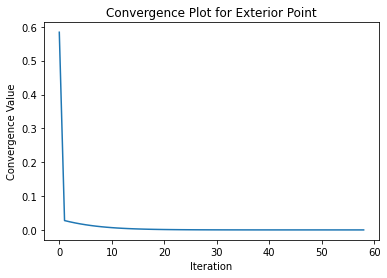

In [121]:
convergence, x_star, k = exterior_penalty(f_penalized, g, np.array([-2, -1.2]), mu=5, rho=1.2)
function_value = f(x_star)
print(f"x*: {x_star}, f(x*): {function_value},, niter: {k}")
plt.plot(convergence)
plt.title("Convergence Plot for Exterior Point")
plt.xlabel("Iteration")
plt.ylabel("Convergence Value")

In [120]:
x_star = [0, 0]
cons = ({'type': 'ineq',
       'fun': g,
    #    'args': arguments       
       })
minimize(f, x_star, constraints=cons)# args=arguments)

     fun: -2.8284271420154594
     jac: array([1., 2.])
 message: 'Optimization terminated successfully'
    nfev: 29
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([-1.41421353, -0.7071068 ])